<a href="https://colab.research.google.com/github/prathamesh1309/ISLR_Python/blob/main/ISLR_Chapter_3_Labs_and_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
%matplotlib inline

In [ ]:
boston = pd.read_csv('./data/Boston.csv',index_col=[0])
boston


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
for col in boston.columns:
    print(col)

crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
black
lstat
medv


In [ ]:
lm = smf.ols('medv ~ lstat', boston)
result = lm.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           5.08e-88
Time:                        18:24:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [ ]:
result.conf_int(alpha=0.025, cols=None)

,0,1
Intercept,33.288987,35.818694
lstat,-1.037127,-0.862972


In [ ]:
predictions=result.get_prediction(pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat']))
summary=predictions.summary_frame()
print(summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  29.803594  0.405247      29.007412      30.599776     17.565675   
1  25.053347  0.294814      24.474132      25.632563     12.827626   
2  20.303101  0.290893      19.731588      20.874613      8.077742   

   obs_ci_upper  
0     42.041513  
1     37.279068  
2     32.528459  


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lstat', ylabel='medv'>

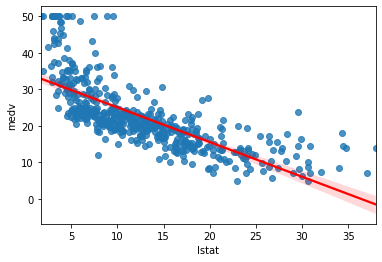

In [ ]:
sns.regplot('lstat', 'medv', boston, line_kws = {"color":"r"})

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

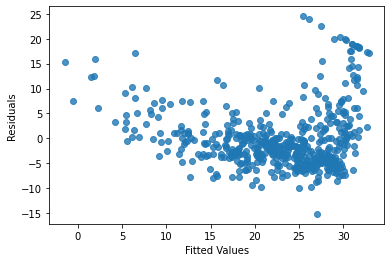

In [ ]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

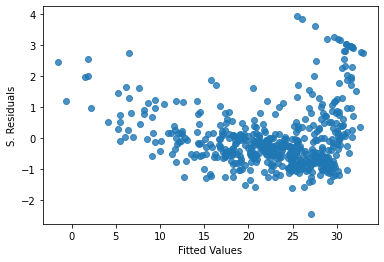

In [ ]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

<AxesSubplot:xlabel='Leverage', ylabel='S. Residuals'>

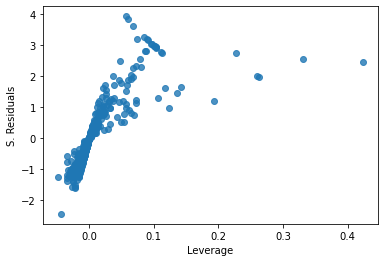

In [ ]:
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

# Multiple Linear Regression

In [ ]:
model = smf.ols('medv ~ lstat + age', boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.98e-88
Time:                        18:24:08   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [ ]:
model = smf.ols('medv ~ ' + '+'.join(boston.columns.difference(['medv'])), boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        18:24:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

# Interaction Terms

In [ ]:
print(smf.ols('medv ~ lstat*age', boston).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.86e-88
Time:                        18:24:08   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# Non-linear Transformations of the Predictors

In [ ]:
lm.fit2 = smf.ols('medv ~ lstat + np.square(lstat)', boston).fit()
print (lm.fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          1.56e-112
Time:                        18:24:08   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

In [ ]:
lm.fit = smf.ols('medv ~ lstat', boston).fit()
print (sm.stats.anova_lm(lm.fit, lm.fit2))

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

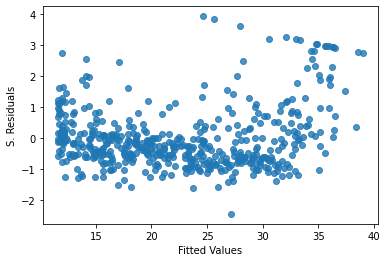

In [ ]:
fitted_values = pd.Series(lm.fit2.fittedvalues, name="Fitted Values")
residuals = pd.Series(lm.fit2.resid, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

In [ ]:
smf.ols('medv ~ ' + '+'.join(['np.power(lstat,' + str(i) + ')' for i in range(1,6)]), boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          8.73e-122
Time:                        18:24:08   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
smf.ols('medv ~ np.log(rm)', boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           1.22e-64
Time:                        18:24:08   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Qualitative Predictors

In [ ]:
carseats = pd.read_csv('./data/Carseats.csv',index_col=[0])
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
smf.ols('Sales ~ Income:Advertising+Price:Age + ' + "+".join(carseats.columns.difference(['Sales'])), carseats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          6.14e-166
Time:                        18:24:08   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Writing Functions

In [ ]:
def LoadLibraries():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from statsmodels.stats.outliers_influence import OLSInfluence
    print('The libraries have been loaded .')

In [ ]:
LoadLibraries()

The libraries have been loaded .


# Q8.(a)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from statsmodels.stats.outliers_influence import OLSInfluence
%matplotlib inline

In [ ]:
auto = pd.read_csv('./data/Auto.csv',index_col='name')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [ ]:
lm = smf.ols('mpg ~ horsepower', auto)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        18:24:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [ ]:
predictions=result.get_prediction(pd.DataFrame([[1, 98]], columns=['Intercept', 'horsepower']))
summary=predictions.summary_frame()
print(summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


# Q8.(b)

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

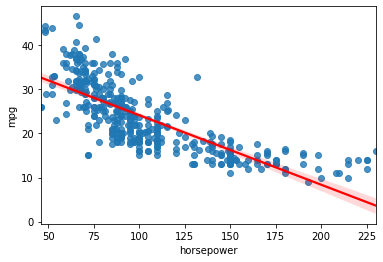

In [ ]:
sns.regplot('horsepower', 'mpg', auto, line_kws = {"color":"r"})

# Q8.(c)

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

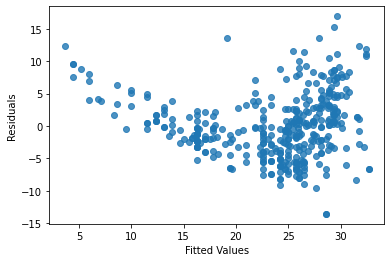

In [ ]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

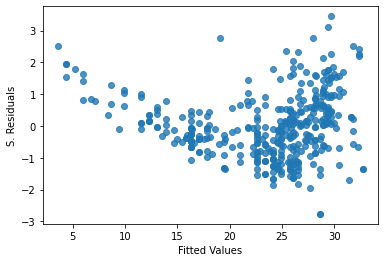

In [ ]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

<AxesSubplot:xlabel='Leverage', ylabel='S. Residuals'>

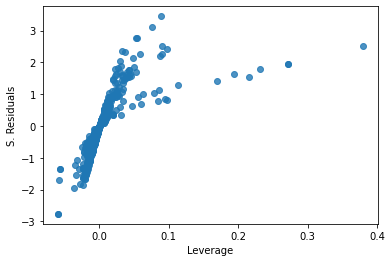

In [ ]:
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

# Q9.(a)

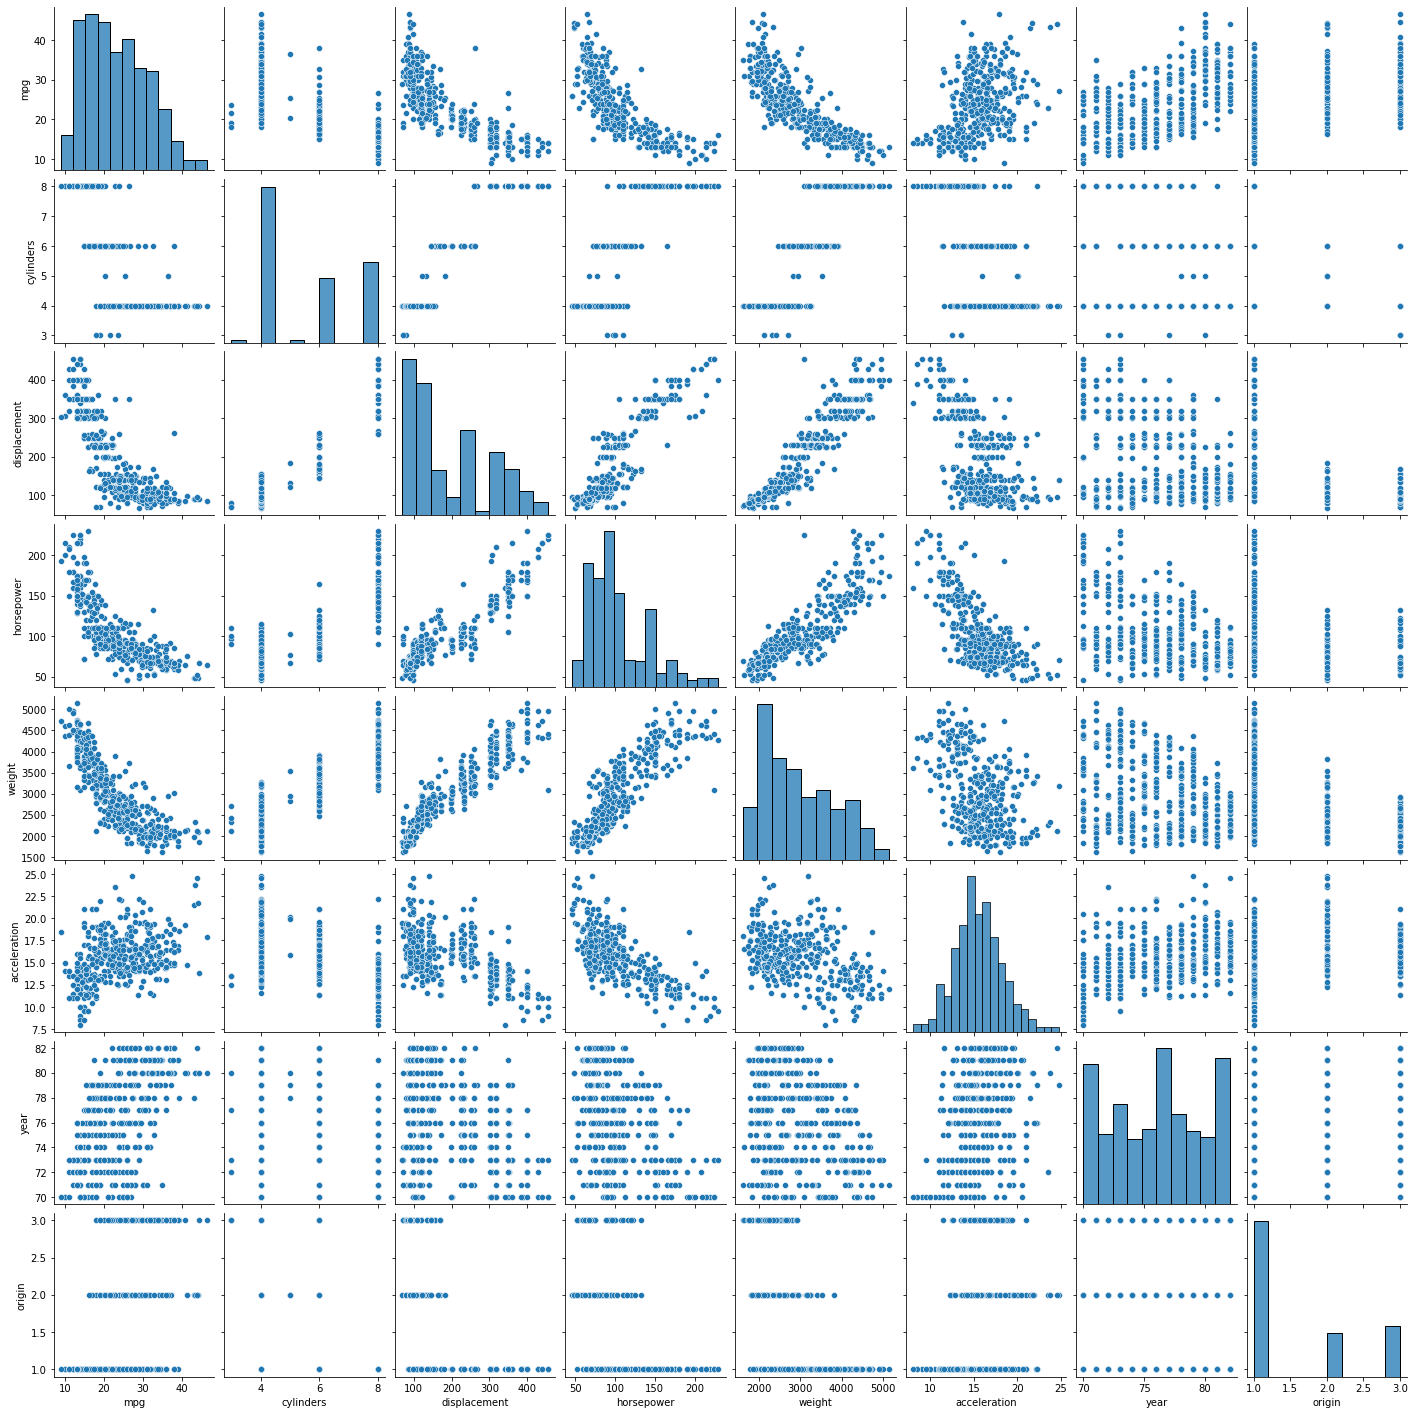

In [ ]:
sns.pairplot(auto)

# Q9.(b)

In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


# Q9.(c)

In [ ]:
model = smf.ols('mpg ~ ' + '+'.join(auto.columns.difference(['mpg'])), auto)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        18:24:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

# Q9.(d)

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

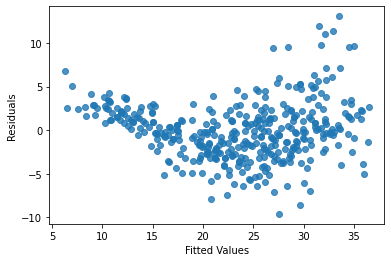

In [ ]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

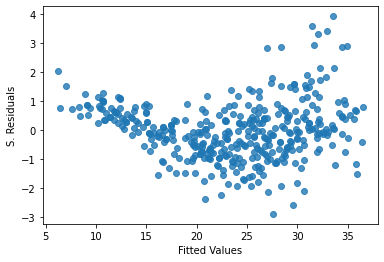

In [ ]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

<AxesSubplot:xlabel='Leverage', ylabel='S. Residuals'>

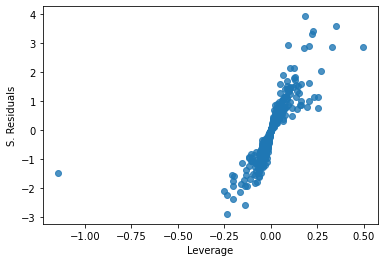

In [ ]:
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

# Q9.(e)

In [ ]:
model = smf.ols('mpg ~ ' + '+'.join(auto.columns.difference(['mpg']))+'+ horsepower:weight + displacement:acceleration', auto)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.32e-160
Time:                        18:24:46   Log-Likelihood:                -968.13
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     382   BIC:                             1996.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# Q9.(f)

In [ ]:
model = smf.ols('mpg ~ np.log(cylinders) + displacement + horsepower + np.power(horsepower,2) + weight + acceleration + np.sqrt(year) + origin', auto)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     280.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          6.02e-155
Time:                        18:24:46   Log-Likelihood:                -983.89
No. Observations:                 392   AIC:                             1986.
Df Residuals:                     383   BIC:                             2022.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Q10.(a)

In [ ]:
carseats = pd.read_csv('./data/Carseats.csv', index_col=0)
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
lm1 = smf.ols('Sales ~ Price + Urban + US', data=carseats)
result1 = lm1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     280.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          6.02e-155
Time:                        18:24:46   Log-Likelihood:                -983.89
No. Observations:                 392   AIC:                             1986.
Df Residuals:                     383   BIC:                             2022.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Q10.(e)

In [ ]:
lm = smf.ols('Sales ~ Price + US', data=carseats)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        18:24:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

# Q10.(f)

In [ ]:
result1.rsquared_adj, result.rsquared_adj

(0.23351232697332858, 0.23543045965311715)

# Q10.(g)

In [ ]:
result.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


# Q11.(a)

In [ ]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2 * x * np.random.normal(size=100)

In [ ]:
result = sm.OLS(endog=y, exog=x).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              4.022
Date:                Sat, 10 Apr 2021   Prob (F-statistic):                      0.0477
Time:                        18:24:46   Log-Likelihood:                         -192.27
No. Observations:                 100   AIC:                                      386.5
Df Residuals:                      99   BIC:                                      389.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Q11.(b)

In [ ]:
result = sm.OLS(endog=x, exog=y).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              4.022
Date:                Sat, 10 Apr 2021   Prob (F-statistic):                      0.0477
Time:                        18:24:46   Log-Likelihood:                         -127.94
No. Observations:                 100   AIC:                                      257.9
Df Residuals:                      99   BIC:                                      260.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Q11.(f)

In [ ]:
result_a = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
result_b = sm.OLS(endog=x, exog=sm.add_constant(y)).fit()

result_a.tvalues[1], result_b.tvalues[1]

(1.9386104595445675, 1.9386104595445668)

# Q12.(b)

In [ ]:
np.random.seed(1)
x = np.random.normal(size=100)
y = np.random.normal(size=100)

In [ ]:
result_a = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
result_b = sm.OLS(endog=x, exog=sm.add_constant(y)).fit()

result_a.params[1], result_b.params[1]

(0.09542713365117164, 0.08607652570024836)

# Q12.(c)

In [ ]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x * -1

In [ ]:
result_a = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
result_b = sm.OLS(endog=x, exog=sm.add_constant(y)).fit()

result_a.params[1], result_b.params[1]

(-0.9999999999999998, -0.9999999999999998)

# Q13.(a)

In [ ]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)

# Q13.(b)

In [ ]:
eps = np.random.normal(0, np.sqrt(0.25), 100)

# Q13.(c)

In [ ]:
y = -1 + 0.5 * x + eps

# Q13.(d)

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

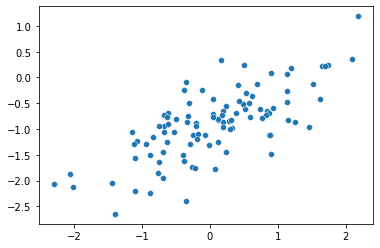

In [ ]:
sns.scatterplot(x,y)

# Q13.(e)

In [ ]:
result = sm.OLS(y,sm.add_constant(x)).fit()
(result.params[0], -1) , (result.params[1], 0.5)

((-0.9264932351508991, -1), (0.5477135668255857, 0.5))

# Q13.(f)

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


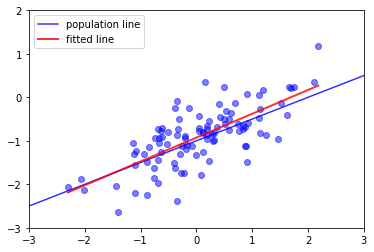

In [ ]:
f =  abline_plot(-1, 0.5, color='blue', alpha=0.8, label='population line')
ax = f.axes[0]
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 2)
sns.regplot(x, y, ax=ax, ci=False, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red', 'alpha': 0.8, 'label': 'fitted line', 'lw': 2})
ax.legend();

# Q13.(g)

In [ ]:
df = pd.DataFrame({'y': y, 'x': x})
result1 = smf.ols(formula='y ~ x + np.power(x, 2)', data=df).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.83e-16
Time:                        18:24:47   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x                  0.5468      0.053     10.229      0.000       0.441       0.653
np.power(x, 2)     0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q13.(h)

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


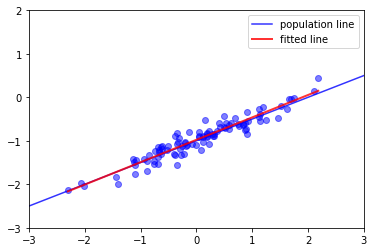

In [ ]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, np.sqrt(0.025), 100)
y = -1 + 0.5 * x + eps
df = pd.DataFrame({'y': y, 'x': x})
result2 = smf.ols(formula='y ~ x + np.power(x, 2)', data=df).fit()

f = abline_plot(-1, 0.5, color='blue', alpha=0.8, label='population line')
ax = f.axes[0]
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 2)
sns.regplot(x, y, ax=ax, ci=False, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red', 'alpha': 0.8, 'label': 'fitted line', 'lw': 2})
ax.legend()


# Q13.(i)

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


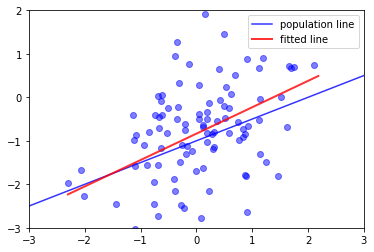

In [ ]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, np.sqrt(1.25), 100)
y = -1 + 0.5 * x + eps

f = abline_plot(-1, 0.5, color='blue', alpha=0.8, label='population line')
ax = f.axes[0]
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 2)
sns.regplot(x, y, ax=ax, ci=False, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red', 'alpha': 0.8, 'label': 'fitted line', 'lw': 2})
ax.legend();


In [ ]:
df = pd.DataFrame({'y': y, 'x': x})
result3 = smf.ols(formula='y ~ x + np.power(x, 2)', data=df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           9.88e-06
Time:                        18:24:48   Log-Likelihood:                -145.58
No. Observations:                 100   AIC:                             297.2
Df Residuals:                      97   BIC:                             305.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8491      0.129     -6.580      0.000      -1.105      -0.593
x                  0.6047      0.120      5.059      0.000       0.367       0.842
np.power(x, 2)     0.0172      0.095      0.181      0.856      -0.172       0.206
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q13.(j)

In [ ]:
result1.conf_int(),result2.conf_int(), result3.conf_int()

(                       0         1
 Intercept      -1.047050 -0.817967
 x               0.440711  0.652908
 np.power(x, 2) -0.076699  0.092122,
                        0         1
 Intercept      -1.014879 -0.942436
 x               0.481251  0.548354
 np.power(x, 2) -0.024255  0.029132,
                        0         1
 Intercept      -1.105208 -0.592961
 x               0.367426  0.841913
 np.power(x, 2) -0.171505  0.205991)

# Q14.(a)

In [ ]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 * np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

# Q14.(b)

In [ ]:
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
df.corr()

,y,x1,x2
y,1.000000,0.446458,0.151493
x1,0.446458,1.000000,0.009249
x2,0.151493,0.009249,1.000000


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

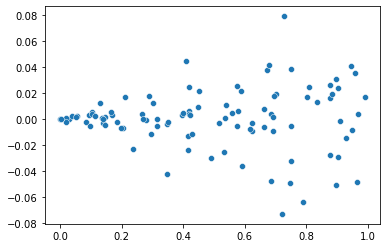

In [ ]:
sns.scatterplot(x1,x2)

# Q14.(c)

In [ ]:
result = smf.ols(formula='y ~ x1 + x2', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     13.76
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           5.48e-06
Time:                        18:24:48   Log-Likelihood:                -142.96
No. Observations:                 100   AIC:                             291.9
Df Residuals:                      97   BIC:                             299.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2392      0.198     11.307      0.000       1.846       2.632
x1             1.7314      0.349      4.967      0.000       1.039       2.423
x2             7.3222      4.452      1.645      0.103      -1.515      16.159
==============================================================================
Omnibus:                        0.854   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.831
Skew:                          -0.214   Prob(JB):                        0.660
Kurtosis:                       2.875   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q14.(d)

In [ ]:
result = smf.ols(formula='y ~ x1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     24.40
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           3.23e-06
Time:                        18:24:48   Log-Likelihood:                -144.33
No. Observations:                 100   AIC:                             292.7
Df Residuals:                      98   BIC:                             297.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2416      0.200     11.222      0.000       1.845       2.638
x1             1.7367      0.352      4.939      0.000       1.039       2.434
==============================================================================
Omnibus:                        0.234   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.416
Skew:                          -0.013   Prob(JB):                        0.812
Kurtosis:                       2.685   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q14.(e)

In [ ]:
result = smf.ols(formula='y ~ x2', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.302
Date:                Sat, 10 Apr 2021   Prob (F-statistic):              0.132
Time:                        18:24:48   Log-Likelihood:                -154.29
No. Observations:                 100   AIC:                             312.6
Df Residuals:                      98   BIC:                             317.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0803      0.114     26.927      0.000       2.853       3.307
x2             7.5267      4.961      1.517      0.132      -2.318      17.371
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.118
Skew:                           0.055   Prob(JB):                        0.943
Kurtosis:                       2.873   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q14.(g)

In [ ]:
new = {'x1': 0.1, 'x2': 0.8, 'y': 6}
df = df.append(new, ignore_index=True)

In [ ]:
result = smf.ols(formula='y ~ x1 + x2', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     17.68
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.78e-07
Time:                        18:24:48   Log-Likelihood:                -144.08
No. Observations:                 101   AIC:                             294.2
Df Residuals:                      98   BIC:                             302.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2346      0.197     11.328      0.000       1.843       2.626
x1             1.7410      0.347      5.015      0.000       1.052       2.430
x2             4.7064      1.245      3.782      0.000       2.237       7.176
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.467
Skew:                          -0.141   Prob(JB):                        0.792
Kurtosis:                       2.822   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Leverage', ylabel='S. Residuals'>

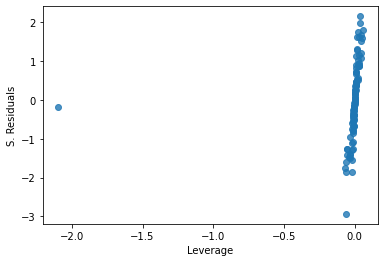

In [ ]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

# Q15.(a)

In [ ]:
boston = pd.read_csv('./data/Boston.csv',index_col=[0])
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
all_models=[smf.ols('crim ~ '+i, boston).fit() for i in boston.columns[1:]]

In [ ]:
for i in all_models:
    print(i.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           5.51e-06
Time:                        18:24:48   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

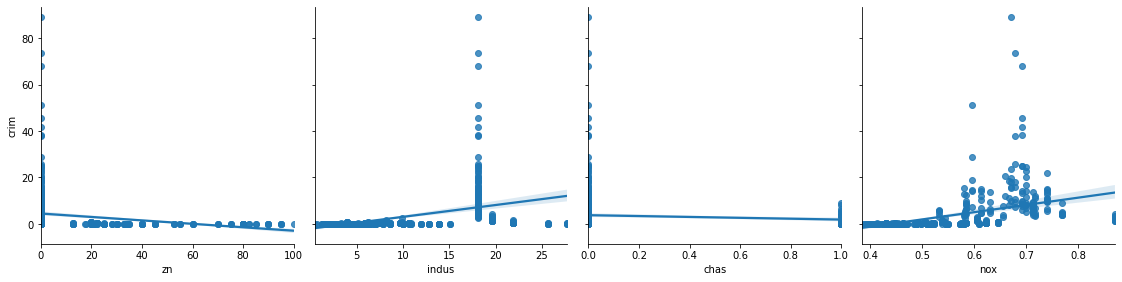

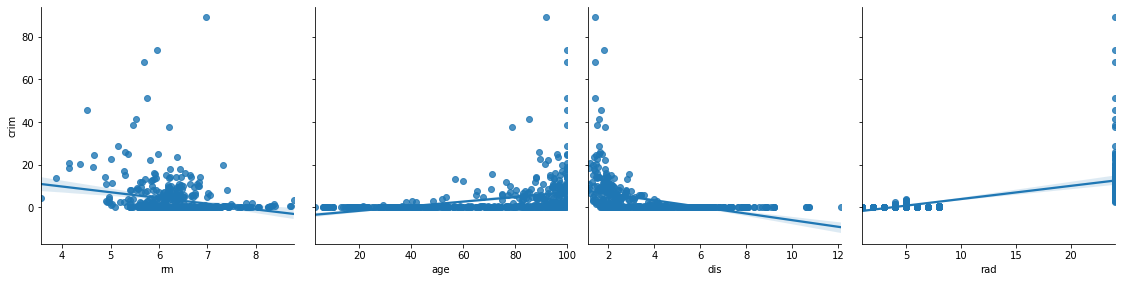

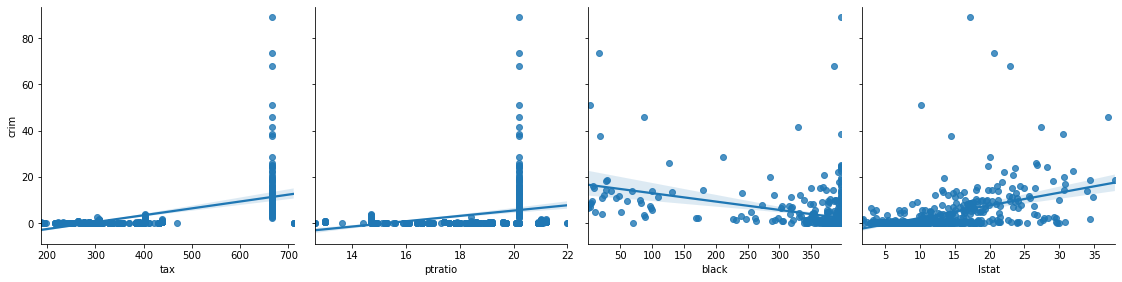

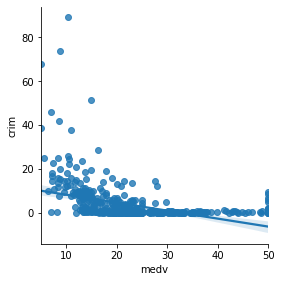

In [ ]:
variables = boston.columns.drop('crim')
for i in range(0, len(variables), 4):
    g = sns.PairGrid(boston, y_vars=['crim'], x_vars=variables[i:i+4], height=4)
    g.map(sns.regplot);

# Q15.(b)

In [ ]:
model2 = smf.ols('crim ~ ' + '+'.join(boston.columns.difference(['crim'])), boston)
result = model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        18:24:51   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

# Q15.(c)

,Univariate_coef,Multivariate_coef
age,0.107786,0.001452
black,-0.036280,-0.007538
chas,-1.892777,-0.749134
dis,-1.550902,-0.987176
indus,0.509776,-0.063855
lstat,0.548805,0.126211
medv,-0.363160,-0.198887
nox,31.248531,-10.313535
ptratio,1.151983,-0.271081
rad,0.617911,0.588209


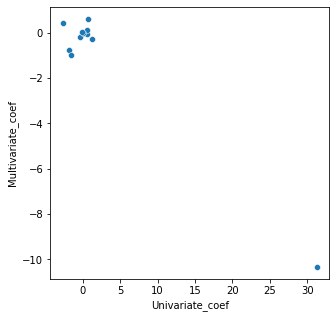

In [ ]:
univariate_params = pd.concat([m.params[1:] for m in all_models])
multivariate_params = result.params[1:]
df = pd.DataFrame({'Univariate_coef': univariate_params, 
                   'Multivariate_coef': multivariate_params,})
display(df)

plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='Univariate_coef', y='Multivariate_coef', data=df)

# Q15.(d)

In [ ]:
all_models = [smf.ols(formula='crim ~ {0} + np.power({0}, 2) + np.power({0}, 3)'.format(f), data=boston).fit() for f in boston.columns[1:]]

In [ ]:
for i in all_models:
    print(i.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           1.28e-06
Time:                        18:24:51   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     